In [19]:
%load_ext autoreload
%autoreload 2

from nuclei_segmentation.pipeline import load_image, save_image, crop_image, segment_and_classify
from nuclei_segmentation.process import process_image
from nuclei_segmentation.segmentation import to_grayscale, smooth_image, threshold_image, threshold_segmentation, watershed_segmentation
from nuclei_segmentation.classification import classify_nuclei_by_brownness
from nuclei_segmentation.visualization import visualize_image, draw_outlines
import logging

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s | %(levelname)s | %(message)s",
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


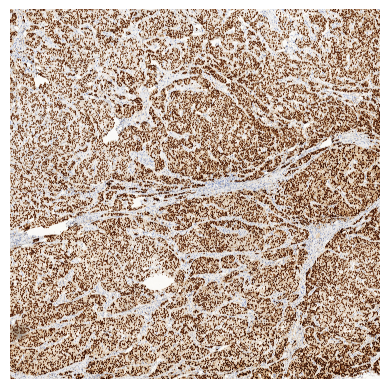

Image shape: (16384, 16384, 3)


In [10]:
image = load_image("../example/input.jpg")

visualize_image(image)

print("Image shape:", image.shape)

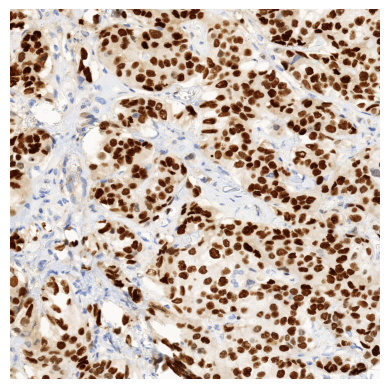

Image shape: (3000, 3000, 3)


In [11]:
image_crop = crop_image(image, crop_size = 3000)

visualize_image(image_crop)

print("Image shape:", image_crop.shape)

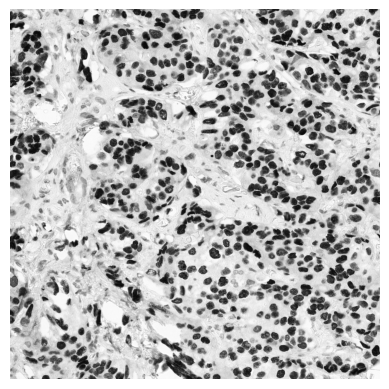

In [12]:
gray = to_grayscale(image_crop)
visualize_image(gray)

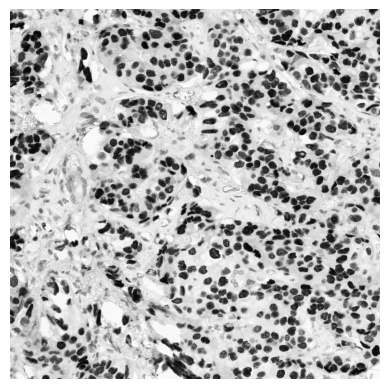

In [13]:
blurred = smooth_image(gray)
visualize_image(blurred)

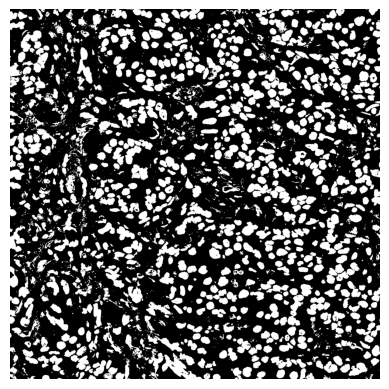

In [14]:
binary = threshold_image(blurred)
visualize_image(binary)

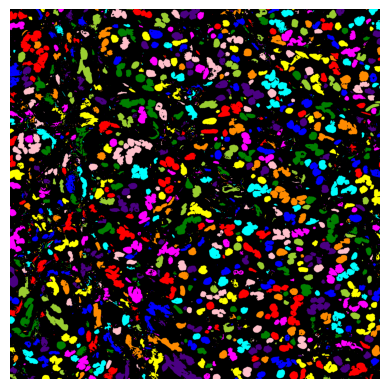

In [15]:
thr__labeled, thr_colored = threshold_segmentation(image_crop)
visualize_image(thr_colored)

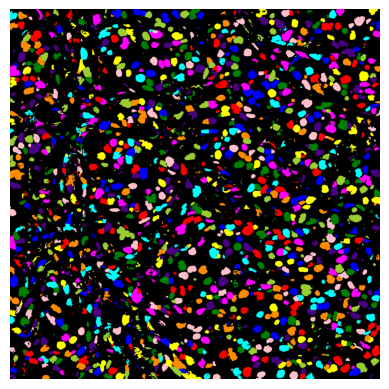

In [16]:
wat_labeled, wat_colored = watershed_segmentation(image_crop)
visualize_image(wat_colored)

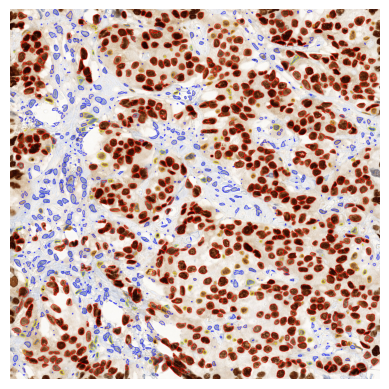

In [22]:
outline_color_pairs = classify_nuclei_by_brownness(image_crop, wat_labeled)
wat_classified_image = draw_outlines(image_crop, outline_color_pairs, thickness=2)
visualize_image(wat_classified_image)

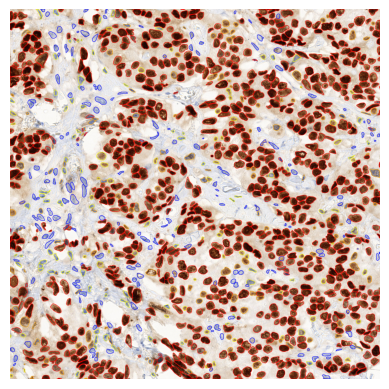

In [24]:
dl_classified_image = process_image(image_crop, method = "deep_learning")
visualize_image(dl_classified_image)

In [20]:
segment_and_classify("../example/input.jpg", "watershed_output.jpg", method = "watershed")

2025-12-15 11:43:19,512 | INFO | Loading image from ../example/input.jpg
2025-12-15 11:43:21,134 | INFO | Cropping image...
2025-12-15 11:43:21,135 | INFO | Performing watershed segmentation...
2025-12-15 11:43:21,983 | INFO | Classifying nuclei by brownness...
2025-12-15 11:43:22,207 | INFO | Drawing outlines on image...
2025-12-15 11:43:22,224 | INFO | Saving output to watershed_output.jpg
2025-12-15 11:43:22,288 | INFO | Segmentation and classification finished


In [28]:
segment_and_classify("../example/input.jpg", "dl_output.jpg", method="deep_learning")

2025-12-14 20:08:28,468 | INFO | Loading image from ../example/input.jpg
2025-12-14 20:08:30,122 | INFO | Cropping image...
2025-12-14 20:08:30,122 | INFO | Performing deep learning segmentation with cellpose...
2025-12-14 20:08:30,125 | INFO | ** TORCH MPS version installed and working. **
2025-12-14 20:08:30,126 | INFO | >>>> using GPU (MPS)
2025-12-14 20:08:31,248 | INFO | >>>> loading model /Users/moldor/.cellpose/models/cpsam
2025-12-14 20:08:32,149 | INFO | processing image with (2000, 2000) HW, and 3 channels
2025-12-14 20:09:23,238 | INFO | Drawing outlines on image...
2025-12-14 20:09:23,251 | INFO | Saving output to dl_output.jpg
2025-12-14 20:09:23,320 | INFO | Segmentation and classification finished
